<a href="https://colab.research.google.com/github/shubhu1026/AI-ML/blob/main/Shubham_Patel_ADL_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding,Dropout,GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
data = pd.read_csv("ZC.csv")

In [ ]:
data.head()

,name,line
0,Human,Human is the most dangerous race
1,Human,We rule the world
2,Human,Time to go to work
3,Human,Where are you from?))))
4,Human,Roadtrip!


In [ ]:
texts = data['line'].values
labels = data['name'].astype('category').cat.codes.values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["line"])
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
max_len = max(len(seq) for seq in sequences)

In [ ]:
padded_sequences = pad_sequences(sequences, maxlen=max_len)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size = 0.1)

In [ ]:
input_layer = Input(shape=(max_len,))

x = Embedding(input_dim=vocab_size, output_dim=64)(input_layer)
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(2, activation='softmax')(x)

model = Model(input_layer, x)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [ ]:
hist = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=100, callbacks=[early_stopping], verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.5631 - loss: 0.6911 - val_accuracy: 0.6667 - val_loss: 0.6727
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5904 - loss: 0.6813 - val_accuracy: 0.6667 - val_loss: 0.6584
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6060 - loss: 0.6719 - val_accuracy: 0.6667 - val_loss: 0.6371
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6177 - loss: 0.6600 - val_accuracy: 0.6667 - val_loss: 0.6215
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6294 - loss: 0.6527 - val_accuracy: 0.6667 - val_loss: 0.6163
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5982 - loss: 0.6728 - val_accuracy: 0.6667 - val_loss: 0.6244
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5786 - loss: 0.6797 - val_accuracy: 0.6667 - val_loss: 0.6309
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6333 - loss: 0.6482 - val_accuracy: 0.6667 - val_loss

In [ ]:
trainAcc = [100 * x for x in hist.history['accuracy']]
testAcc = [100 * x for x in hist.history['val_accuracy']]

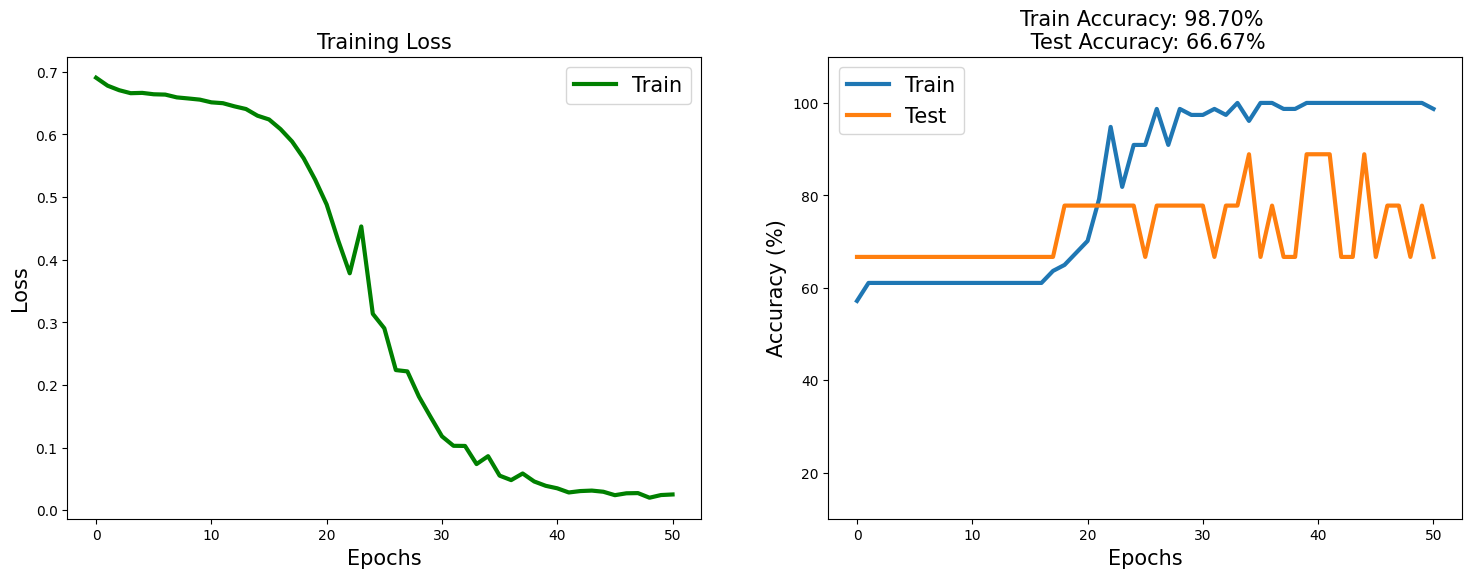

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(hist.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)


ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()